# Most Suitable Zip Codes for Young Families Moving to the Boston Area

## 1. Import Packages and explore Massachusetts Metropolitan Areas Shapefile

In [1]:
import pandas as pd
import numpy as np
import geopandas as gpd
import matplotlib.pyplot as plt
import contextily as cx

In [2]:
boundaries = gpd.read_file('data/MPO_Boundaries/MPO_Boundaries.shp')

In [3]:
boundaries.head()

,OBJECTID,MPO,created_us,created_da,last_edite,last_edi_1,GlobalID,ShapeSTAre,ShapeSTLen,geometry
0,2,Berkshire,None,1970-01-01,None,1970-01-01,{08FDA544-18B0-412A-B442-287E53E987F7},2.451015e+09,2.471530e+05,"POLYGON ((-8128884.676 5272654.345, -8128962.2..."
1,3,Cape Cod,None,1970-01-01,None,1970-01-01,{B6CD90CF-2F7D-43F2-B251-FA7F8E00EF01},1.067067e+09,1.288227e+06,"MULTIPOLYGON (((-7813968.781 5173329.197, -781..."
2,4,Central Massachusetts,None,1970-01-01,None,1970-01-01,{CC777E14-53C8-42AD-B421-71444DA0BB60},2.487546e+09,2.683265e+05,"POLYGON ((-7977225.352 5223837.273, -7973861.8..."
3,5,Franklin,None,1970-01-01,None,1970-01-01,{4804E708-6B89-4A85-9383-BD91F7589981},1.876456e+09,2.527017e+05,"POLYGON ((-8046511.241 5269691.856, -8045276.8..."
4,6,Montachusett,None,1970-01-01,None,1970-01-01,{F315DA63-C9CF-40EE-8AA7-5ABA2E1FD528},1.772355e+09,2.748684e+05,"POLYGON ((-7976246.504 5267152.001, -7976121.9..."


## 2. Import Zip Codes shapefilie, change both layers to MA State Plane Projection

In [4]:
zipcodes = gpd.read_file('data/zipcodes/tl_2010_25_zcta510.shp')

In [94]:
zipcodes = zipcodes.to_crs("epsg:26986") #MA State Plane Projection

In [6]:
boundaries = boundaries.to_crs("epsg:26986") #MA State Plane Projection

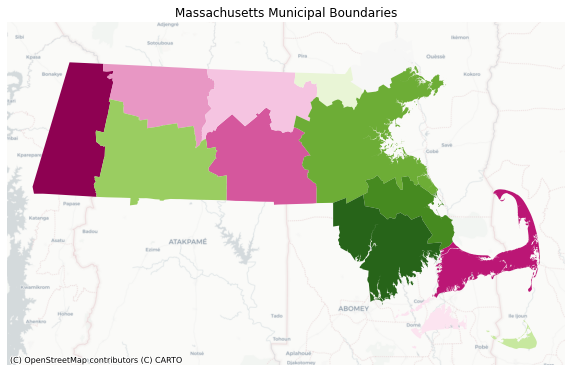

In [7]:
fig, ax = plt.subplots(figsize=(10, 10))
boundaries.plot(column='OBJECTID', cmap='PiYG', ax=ax).set_title('Massachusetts Municipal Boundaries')
cx.add_basemap(ax, source=cx.providers.CartoDB.Positron)
ax.set_axis_off()

In [8]:
zipcodes.head()

,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry
0,25,02536,2502536,B5,G6350,S,71696166,9066635,+41.5969756,-070.5678768,N,"POLYGON ((275712.154 812608.480, 275688.314 81..."
1,25,02556,2502556,B5,G6350,S,10034104,1164445,+41.6394454,-070.6245149,N,"POLYGON ((273020.046 818874.990, 272816.173 81..."
2,25,02540,2502540,B5,G6350,S,27746696,4550024,+41.5741900,-070.6282848,N,"POLYGON ((273020.046 818874.990, 273126.263 81..."
3,25,02646,2502646,B5,G6350,S,7798581,801405,+41.6705961,-070.0714493,N,"POLYGON ((318297.748 826255.912, 318348.040 82..."
4,25,01237,2501237,B5,G6350,S,160121626,1140685,+42.5478177,-073.2680327,N,"POLYGON ((57335.091 917317.398, 57310.861 9173..."


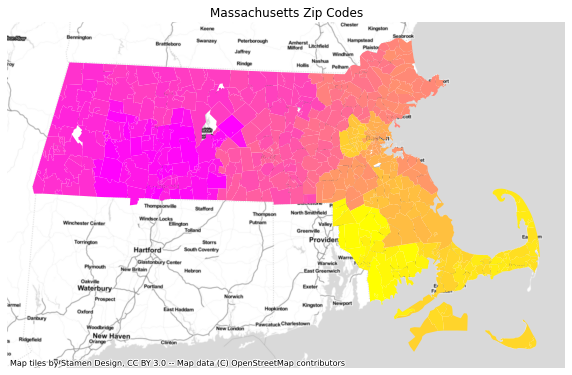

In [9]:
fig, ax = plt.subplots(figsize=(10, 10))
zipcodes.plot(column='ZCTA5CE10', cmap = 'spring', ax=ax)\
.set_title('Massachusetts Zip Codes')
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite, \
               crs=zipcodes.crs.to_string())
ax.set_axis_off()

## 3. Clip zip code layer to Boston Region MPO

In [10]:
boston_region = boundaries[boundaries.MPO=="Boston Region"].copy()

<AxesSubplot:>

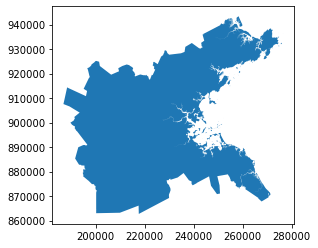

In [11]:
boston_region.plot()

In [12]:
boston_zipcodes = gpd.clip(zipcodes, boston_region)

<AxesSubplot:>

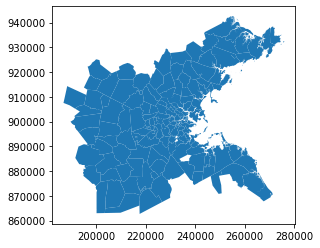

In [13]:
boston_zipcodes.plot()

## 4. Analyze school availability per zip code

A variety of educational opportunities is important to many young families who wish to enroll their children in a high quality program. Below, I import school points, calculate the number of schools per zip code, and display the number of schools on a map.

In [14]:
schools = gpd.read_file('data/schools/SCHOOLS_PT.shp')

In [15]:
schools

,SCHID,NAME,ADDRESS,TOWN_MAIL,TOWN,ZIPCODE,PHONE,GRADES,TYPE,TYPE_DESC,DIST_NAME,DIST_CODE,MAD_ID,TYPE_DESC2,geometry
0,03090020,Stanley M Koziol Elementary School,4 Gould Road,Ware,WARE,01082,413-967-6236,"PK,K,01,02,03",ELE,Public Elementary,Ware,03090000,1003108,None,POINT (137104.992 889501.256)
1,06220010,Millville Elementary School,122 Berthelette Way,Millville,MILLVILLE,01529,508-876-0177,"PK,K,01,02,03,04,05",ELE,Public Elementary,Blackstone-Millville,06220000,1708902,None,POINT (193535.347 864680.374)
2,00440080,Frederick Douglass Academy,175 Warren Avenue,Brockton,BROCKTON,02301,508-580-7033,"06,07,08,09,10,11,12",SEC,Public Secondary,Brockton,00440000,3278046,None,POINT (239410.709 870353.747)
3,04560050,Lowell Community Charter Public School,206 Jackson Street,Lowell,LOWELL,01852,978-323-0800,"PK,K,01,02,03,04,05,06,07,08",CHA,Charter,Lowell Community Charter,04560000,1978735,None,POINT (215408.324 932324.148)
4,02390005,Cold Spring School,25 Alden Street,Plymouth,PLYMOUTH,02360,508-830-4335,"K,01,02,03,04,05",ELE,Public Elementary,Plymouth,02390000,2176192,None,POINT (268146.542 857250.077)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2454,04390050,Conservatory Lab Charter School,2120 Dorchester Avenue,Dorchester,BOSTON,02124,617-254-8904,"PK,K,01,02,03,04,05,06,07,08",CHA,Charter,Conservatory Lab Charter,04390000,35164510,None,POINT (235821.855 891970.515)
2455,01490890,Notre Dame Cristo Rey High School,303 Haverhill Street,Lawrence,LAWRENCE,01840,978-689-8222,"09,10,11,12",PRI,Private,None,None,2124790,None,POINT (227235.383 940010.302)
2456,01140505,Greenfield High School,21 Barr Avenue,Greenfield,GREENFIELD,01301,413-772-1350,"08,09,10,11,12",SEC,Public Secondary,Greenfield,01140000,214271,None,POINT (110192.653 928865.753)
2457,02010803,Early Learning Child Care,322 Maxfield Street,New Bedford,NEW BEDFORD,02740,508-996-3774,PK,PRI,Private,None,None,None,None,POINT (246957.232 821204.731)


In [16]:
boston_zipcodes

,STATEFP10,ZCTA5CE10,GEOID10,CLASSFP10,MTFCC10,FUNCSTAT10,ALAND10,AWATER10,INTPTLAT10,INTPTLON10,PARTFLG10,geometry
17,25,01905,2501905,B5,G6350,S,9219345,1195154,+42.4659985,-070.9757922,N,"MULTIPOLYGON (((243877.753 913824.638, 243872...."
18,25,01904,2501904,B5,G6350,S,11708211,1303900,+42.4924563,-070.9739297,N,"POLYGON ((245700.484 914778.700, 245667.412 91..."
20,25,01930,2501930,B5,G6350,S,67847425,13972397,+42.6199100,-070.6818235,N,"MULTIPOLYGON (((261745.067 931625.267, 261822...."
21,25,01915,2501915,B5,G6350,S,39091336,3958118,+42.5702688,-070.8669962,N,"MULTIPOLYGON (((250787.714 926889.372, 251155...."
22,25,01921,2501921,B5,G6350,S,61010486,2188501,+42.6831083,-071.0183302,N,"MULTIPOLYGON (((245193.985 936821.773, 244097...."
...,...,...,...,...,...,...,...,...,...,...,...,...
526,25,02129,2502129,B5,G6350,S,3492181,1266666,+42.3796570,-071.0614875,N,"MULTIPOLYGON (((235381.204 902518.358, 235374...."
527,25,02128,2502128,B5,G6350,S,12561059,2952872,+42.3611289,-071.0069754,N,"MULTIPOLYGON (((240184.037 905141.775, 240204...."
528,25,02122,2502122,B5,G6350,S,5263269,1641767,+42.2914125,-071.0421575,N,"MULTIPOLYGON (((237311.389 892366.860, 237300...."
529,25,02151,2502151,B5,G6350,S,15190546,3291332,+42.4182938,-071.0012566,N,"MULTIPOLYGON (((240204.477 905138.116, 240184...."


In [17]:
boston_zipcodes.rename(columns={"ZCTA5CE10":"ZIPCODE"}, inplace = True)

In [18]:
boston_zipcodes = boston_zipcodes[['ZIPCODE', 'ALAND10', 'geometry']]

In [19]:
boston_zipcodes

,ZIPCODE,ALAND10,geometry
17,01905,9219345,"MULTIPOLYGON (((243877.753 913824.638, 243872...."
18,01904,11708211,"POLYGON ((245700.484 914778.700, 245667.412 91..."
20,01930,67847425,"MULTIPOLYGON (((261745.067 931625.267, 261822...."
21,01915,39091336,"MULTIPOLYGON (((250787.714 926889.372, 251155...."
22,01921,61010486,"MULTIPOLYGON (((245193.985 936821.773, 244097...."
...,...,...,...
526,02129,3492181,"MULTIPOLYGON (((235381.204 902518.358, 235374...."
527,02128,12561059,"MULTIPOLYGON (((240184.037 905141.775, 240204...."
528,02122,5263269,"MULTIPOLYGON (((237311.389 892366.860, 237300...."
529,02151,15190546,"MULTIPOLYGON (((240204.477 905138.116, 240184...."


In [20]:
schools_count = schools[['SCHID', 'ZIPCODE']]\
.groupby('ZIPCODE').nunique().reset_index()

In [21]:
schools_count.rename(columns = {"SCHID" : "school_count"}, inplace = True)

In [22]:
schools_count

,ZIPCODE,school_count
0,01001,7
1,01002,8
2,01004,1
3,01005,4
4,01007,5
...,...,...
456,02771,4
457,02777,9
458,02779,2
459,02780,15


In [23]:
boston_zipcodes = boston_zipcodes.merge(schools_count, how='left', on='ZIPCODE')

In [116]:
boston_zipcodes = boston_zipcodes.replace(np.nan,0)

In [117]:
boston_zipcodes

,ZIPCODE,ALAND10,geometry,school_count,lib_count,market_count,geo_area,id,kinder_enrolled,reclass_enroll,reclass_schools,reclass_libs,reclass_markets,suitability
0,01905,9219345,"MULTIPOLYGON (((243877.753 913824.638, 243872....",11.0,0.0,0.0,ZCTA5 01905,8600000US01905,259,3.0,3.0,0.0,0.0,0.00
1,01904,11708211,"POLYGON ((245700.484 914778.700, 245667.412 91...",7.0,0.0,0.0,ZCTA5 01904,8600000US01904,182,3.0,3.0,0.0,0.0,0.00
2,01930,67847425,"MULTIPOLYGON (((261745.067 931625.267, 261822....",9.0,2.0,2.0,ZCTA5 01930,8600000US01930,262,3.0,3.0,3.0,3.0,3.30
3,01915,39091336,"MULTIPOLYGON (((250787.714 926889.372, 251155....",19.0,2.0,1.0,ZCTA5 01915,8600000US01915,448,3.0,3.0,3.0,1.0,3.00
4,01921,61010486,"MULTIPOLYGON (((245193.985 936821.773, 244097....",2.0,1.0,0.0,ZCTA5 01921,8600000US01921,62,1.0,1.0,1.0,0.0,0.00
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,02129,3492181,"MULTIPOLYGON (((235381.204 902518.358, 235374....",5.0,1.0,1.0,ZCTA5 02129,8600000US02129,346,3.0,2.0,1.0,1.0,2.15
193,02128,12561059,"MULTIPOLYGON (((240184.037 905141.775, 240204....",14.0,1.0,1.0,ZCTA5 02128,8600000US02128,627,3.0,3.0,1.0,1.0,2.50
194,02122,5263269,"MULTIPOLYGON (((237311.389 892366.860, 237300....",10.0,2.0,3.0,ZCTA5 02122,8600000US02122,268,3.0,3.0,3.0,3.0,3.30
195,02151,15190546,"MULTIPOLYGON (((240204.477 905138.116, 240184....",12.0,1.0,1.0,ZCTA5 02151,8600000US02151,559,3.0,3.0,1.0,1.0,2.50


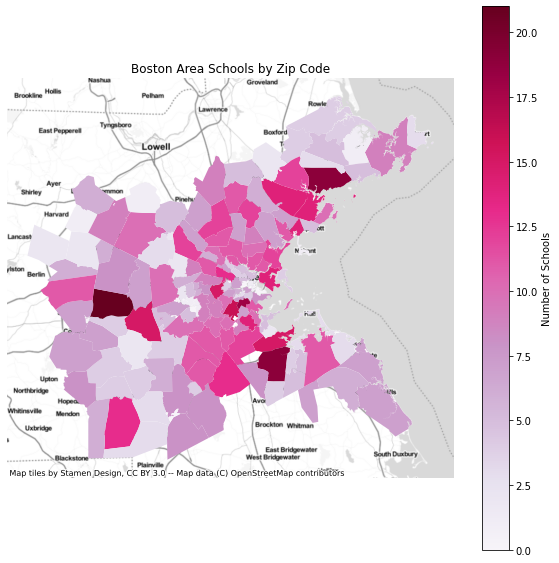

In [118]:
fig, ax = plt.subplots(figsize=(10, 10))
boston_zipcodes.plot(legend=True, column='school_count', \
                     cmap='PuRd', ax=ax, legend_kwds={'label': 'Number of Schools'})\
.set_title('Boston Area Schools by Zip Code')
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite, \
               crs=boston_zipcodes.crs.to_string())
ax.set_axis_off()

In [119]:
head_schools = boston_zipcodes.sort_values(by='school_count', ascending=False)
head_schools.head()

,ZIPCODE,ALAND10,geometry,school_count,lib_count,market_count,geo_area,id,kinder_enrolled,reclass_enroll,reclass_schools,reclass_libs,reclass_markets,suitability
155,01701,43923156,"POLYGON ((200847.034 894832.698, 200861.212 89...",21.0,1.0,1.0,ZCTA5 01701,8600000US01701,315,3.0,3.0,1.0,1.0,2.5
3,01915,39091336,"MULTIPOLYGON (((250787.714 926889.372, 251155....",19.0,2.0,1.0,ZCTA5 01915,8600000US01915,448,3.0,3.0,3.0,1.0,3.0
103,02184,35608882,"MULTIPOLYGON (((238384.523 886250.237, 238429....",19.0,1.0,1.0,ZCTA5 02184,8600000US02184,608,3.0,3.0,1.0,1.0,2.5
66,02119,4136145,"POLYGON ((235115.975 898168.657, 235148.036 89...",18.0,2.0,1.0,ZCTA5 02119,8600000US02119,474,3.0,3.0,3.0,1.0,3.0
21,01810,79897507,"MULTIPOLYGON (((234783.094 928254.106, 234305....",17.0,1.0,1.0,ZCTA5 01810,8600000US01810,357,3.0,3.0,1.0,1.0,2.5


In [120]:
head_schools = boston_zipcodes.sort_values(by='school_count', ascending=False)
head_schools.tail()

,ZIPCODE,ALAND10,geometry,school_count,lib_count,market_count,geo_area,id,kinder_enrolled,reclass_enroll,reclass_schools,reclass_libs,reclass_markets,suitability
148,02210,2399614,"MULTIPOLYGON (((236796.115 900227.415, 236771....",0.0,0.0,0.0,ZCTA5 02210,8600000US02210,14,1.0,0.0,0.0,0.0,0.0
158,02142,716170,"POLYGON ((234327.174 901947.740, 234397.406 90...",0.0,0.0,2.0,ZCTA5 02142,8600000US02142,39,1.0,0.0,0.0,3.0,0.0
39,02109,449654,"POLYGON ((236554.100 900803.425, 236529.563 90...",0.0,0.0,2.0,ZCTA5 02109,8600000US02109,60,1.0,0.0,0.0,3.0,0.0
41,01745,1033541,"MULTIPOLYGON (((200168.222 894056.899, 200171....",0.0,0.0,0.0,ZCTA5 01745,8600000US01745,10,1.0,0.0,0.0,0.0,0.0
174,02203,80317,"POLYGON ((236428.275 901030.482, 236399.691 90...",0.0,0.0,0.0,ZCTA5 02203,8600000US02203,0,1.0,0.0,0.0,0.0,0.0


If school quantity was the only consideration, the zip codes near Marlborough, Braintree, and Salem would be most desirable. However, families typically consider a number of factors before making a move. 

## 5. Library Availability 

The presence of libraries is also a valuable consideration for families with young readers. Similar to the above method with school points, Boston-area libraries were totaled for each zip code, and displayed on a map. 

In [131]:
libraries = gpd.read_file('data/libraries/LIBRARIES_PT.shp')

In [132]:
libraries

,NAME,ADDRESS,TOWN,STATE,ZIP,TYPE,ADDRESS_PO,LIBKEY,NETWORK,REGION,DELIVROUTE,WEBSITE,geometry
0,EGREMONT FREE LIBRARY,1 BUTTONBALL LANE,EGREMONT,MA,01230,PUBLIC,M_42081_880811,PU-EGREMONT-FREE,C/WMARS,Western,Optima,http://egremont-ma.gov/,POINT (42080.824 880810.865)
1,FLORIDA FREE PUBLIC LIBRARY,56 NORTH COUNTY ROAD,FLORIDA,MA,01247,PUBLIC,M_73999_939186,PU-FLORIDA-FREE,C/WMARS,Western,Optima,None,POINT (73998.820 939185.588)
2,HOLYOKE PUBLIC LIBRARY,250 CHESTNUT STREET,HOLYOKE,MA,01040,PUBLIC,M_108126_884338,PU-HOLYOKE-PUBLIC,C/WMARS,Western,Optima,http://www.holyokelibrary.org,POINT (108125.885 884337.953)
3,MASON SQUARE BRANCH LIBRARY,765 STATE STREET,SPRINGFIELD,MA,01109,PUBLIC BRANCH,M_111823_873863,PU-SPRINGFI-CITY,C/WMARS,Western,Optima,http://www.springfieldlibrary.org/,POINT (111822.608 873862.592)
4,NORTH ADAMS PUBLIC LIBRARY,74 CHURCH STREET,NORTH ADAMS,MA,01247,PUBLIC,M_68185_939879,PU-NADAMS-PUBLIC,C/WMARS,Western,Optima,http://www.naplibrary.com,POINT (68185.483 939879.244)
...,...,...,...,...,...,...,...,...,...,...,...,...,...
465,MIDDLEFIELD PUBLIC LIBRARY,188 SKYLINE TRAIL,MIDDLEFIELD,MA,01243,PUBLIC,M_75622_900447,PU-MIDDLEFI-PUBLIC,None,Western,Optima,http://middlefieldma.net/?page_id=172,POINT (75613.611 900456.660)
466,GRISWOLD MEMORIAL LIBRARY,12 MAIN ROAD,COLRAIN,MA,01340,PUBLIC,M_101678_936447,PU-COLRAIN-GRISWOLD,C/WMARS,Western,Optima,http://colrain-ma.gov/departments/library.html,POINT (101678.371 936446.501)
467,TYLER MEMORIAL LIBRARY,157 MAIN STREET,CHARLEMONT,MA,01339,PUBLIC,M_87563_931780,PU-CHARLEMO-TYLER,C/WMARS,Western,Optima,http://www.charlemont-ma.us/town/tyler-memoria...,POINT (87563.123 931783.458)
468,WESTHAMPTON PUBLIC LIBRARY,1 NORTH ROAD,WESTHAMPTON,MA,01027,PUBLIC,M_94935_895687,PU-WESTHAMP-MEMORIAL,C/WMARS,Western,Optima,https://www.westhampton-ma.com/westhampton-pub...,POINT (94935.281 895687.373)


In [133]:
lib_count = libraries[['NAME', 'ZIP']].groupby('ZIP').nunique().reset_index()

In [134]:
lib_count

,ZIP,NAME
0,01001,1
1,01002,4
2,01005,1
3,01007,1
4,01008,1
...,...,...
412,02771,1
413,02777,1
414,02779,1
415,02780,1


In [135]:
lib_count.rename(columns={"ZIP": "ZIPCODE"}, inplace=True)

In [136]:
lib_count.rename(columns = {"NAME": "lib_count"}, inplace=True)

In [137]:
lib_count

,ZIPCODE,lib_count
0,01001,1
1,01002,4
2,01005,1
3,01007,1
4,01008,1
...,...,...
412,02771,1
413,02777,1
414,02779,1
415,02780,1


In [138]:
boston_zipcodes = boston_zipcodes.merge(lib_count, how='left', on='ZIPCODE')

In [139]:
boston_zipcodes

,ZIPCODE,ALAND10,geometry,school_count,lib_count_x,market_count,geo_area,id,kinder_enrolled,reclass_enroll,reclass_schools,reclass_libs,reclass_markets,suitability,lib_count_y,lib_count
0,01905,9219345,"MULTIPOLYGON (((243877.753 913824.638, 243872....",11.0,0.0,0.0,ZCTA5 01905,8600000US01905,259,3.0,3.0,0.0,0.0,0.00,0.0,NaN
1,01904,11708211,"POLYGON ((245700.484 914778.700, 245667.412 91...",7.0,0.0,0.0,ZCTA5 01904,8600000US01904,182,3.0,3.0,0.0,0.0,0.00,0.0,NaN
2,01930,67847425,"MULTIPOLYGON (((261745.067 931625.267, 261822....",9.0,2.0,2.0,ZCTA5 01930,8600000US01930,262,3.0,3.0,3.0,3.0,3.30,2.0,2.0
3,01915,39091336,"MULTIPOLYGON (((250787.714 926889.372, 251155....",19.0,2.0,1.0,ZCTA5 01915,8600000US01915,448,3.0,3.0,3.0,1.0,3.00,2.0,2.0
4,01921,61010486,"MULTIPOLYGON (((245193.985 936821.773, 244097....",2.0,1.0,0.0,ZCTA5 01921,8600000US01921,62,1.0,1.0,1.0,0.0,0.00,1.0,1.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,02129,3492181,"MULTIPOLYGON (((235381.204 902518.358, 235374....",5.0,1.0,1.0,ZCTA5 02129,8600000US02129,346,3.0,2.0,1.0,1.0,2.15,1.0,1.0
193,02128,12561059,"MULTIPOLYGON (((240184.037 905141.775, 240204....",14.0,1.0,1.0,ZCTA5 02128,8600000US02128,627,3.0,3.0,1.0,1.0,2.50,1.0,1.0
194,02122,5263269,"MULTIPOLYGON (((237311.389 892366.860, 237300....",10.0,2.0,3.0,ZCTA5 02122,8600000US02122,268,3.0,3.0,3.0,3.0,3.30,2.0,2.0
195,02151,15190546,"MULTIPOLYGON (((240204.477 905138.116, 240184....",12.0,1.0,1.0,ZCTA5 02151,8600000US02151,559,3.0,3.0,1.0,1.0,2.50,1.0,1.0


In [140]:
boston_zipcodes = boston_zipcodes.replace(np.nan,0)

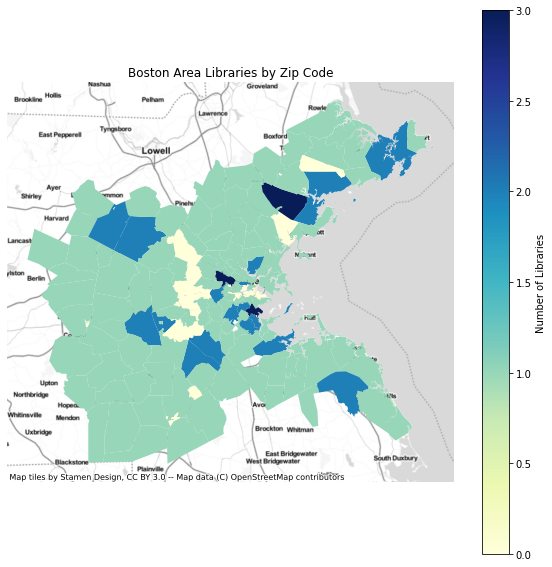

In [141]:
fig, ax = plt.subplots(figsize=(10, 10))
boston_zipcodes.plot(legend=True,column='lib_count', \
                     cmap='YlGnBu', ax=ax, \
                     legend_kwds={'label':'Number of Libraries'})\
.set_title('Boston Area Libraries by Zip Code')
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite, \
               crs=boston_zipcodes.crs.to_string())
ax.set_axis_off()

In [142]:
head_lib = boston_zipcodes.sort_values(by='lib_count', ascending=False)
head_lib.head()

,ZIPCODE,ALAND10,geometry,school_count,lib_count_x,market_count,geo_area,id,kinder_enrolled,reclass_enroll,reclass_schools,reclass_libs,reclass_markets,suitability,lib_count_y,lib_count
129,02138,7097709,"POLYGON ((228178.405 903580.338, 228173.291 90...",13.0,3.0,2.0,ZCTA5 02138,8600000US02138,221,3.0,3.0,3.0,3.0,3.3,3.0,3.0
71,01960,41432495,"MULTIPOLYGON (((238416.698 922683.435, 238382....",14.0,3.0,1.0,ZCTA5 01960,8600000US01960,249,3.0,3.0,3.0,1.0,3.0,3.0,3.0
17,02125,5523791,"POLYGON ((235239.626 895597.505, 235250.427 89...",11.0,3.0,0.0,ZCTA5 02125,8600000US02125,542,3.0,3.0,3.0,0.0,0.0,3.0,3.0
76,01742,63296150,"POLYGON ((214918.759 914238.443, 214941.033 91...",10.0,2.0,0.0,ZCTA5 01742,8600000US01742,228,3.0,3.0,3.0,0.0,0.0,2.0,2.0
130,02141,1657355,"POLYGON ((234157.274 901975.126, 234123.392 90...",5.0,2.0,0.0,ZCTA5 02141,8600000US02141,176,2.0,2.0,3.0,0.0,0.0,2.0,2.0


In [143]:
head_lib = boston_zipcodes.sort_values(by='lib_count', ascending=False)
head_lib.tail()

,ZIPCODE,ALAND10,geometry,school_count,lib_count_x,market_count,geo_area,id,kinder_enrolled,reclass_enroll,reclass_schools,reclass_libs,reclass_markets,suitability,lib_count_y,lib_count
158,02142,716170,"POLYGON ((234327.174 901947.740, 234397.406 90...",0.0,0.0,2.0,ZCTA5 02142,8600000US02142,39,1.0,0.0,0.0,3.0,0.0,0.0,0.0
41,01745,1033541,"MULTIPOLYGON (((200168.222 894056.899, 200171....",0.0,0.0,0.0,ZCTA5 01745,8600000US01745,10,1.0,0.0,0.0,0.0,0.0,0.0,0.0
39,02109,449654,"POLYGON ((236554.100 900803.425, 236529.563 90...",0.0,0.0,2.0,ZCTA5 02109,8600000US02109,60,1.0,0.0,0.0,3.0,0.0,0.0,0.0
36,02457,413241,"POLYGON ((219395.018 894055.646, 219398.270 89...",0.0,0.0,0.0,ZCTA5 02457,8600000US02457,0,1.0,0.0,0.0,0.0,0.0,0.0,0.0
0,01905,9219345,"MULTIPOLYGON (((243877.753 913824.638, 243872....",11.0,0.0,0.0,ZCTA5 01905,8600000US01905,259,3.0,3.0,0.0,0.0,0.0,0.0,0.0


While several zip codes appear to have at least two libraries within their boundaries, the zip codes near Lynn, Somerville, and Boston proper have a whopping 3 for families with book worms. 

## 6. Presence of Farmers Markets

Buying produce from local farmers markets is not only a fun weekend activity for families, but is a healthy and affordable nutrition option. The same analysis used for schools and libraries is also applied to farmers markets below. 

In [36]:
farmers_markets = gpd.read_file('data/farmers_markets/FARMERSMARKETS_PT.shp')

In [37]:
farmers_markets

,MARKET_ID,NAME,TYPE,ADDR_1,ADDR_2,TOWN,ZIP_CODE,DAY_TIME,DATES,UPDATE_DAT,YEAR_START,WEBSITE,EBT,WIC_CVV,COUPONS,LONGITUDE,LATITUDE,geometry
0,606.0,Sustainable Nantucket/Wednesday,Farmers Markets,113 Pleasant St.,Next to Glidden's Seafood,Nantucket,02554,"Wednesday, 3:30 pm - 6:30 pm",July 6 to September 14,2016,2016,http://www.sustainablenantucket.org,EBT-SNAP Accepted,None,WIC & Senior Coupons Accepted,-70.09361,41.27301,POINT (317843.084 781295.223)
1,607.0,Holden/Market on Main at Jed's,Farmers Markets,450 Main St.,Jed's Hardware and Garden,Holden,01520,"Friday, 3:30 pm - 7:00 pm",May 20 to October 28,2016,2016,None,None,None,None,-71.83454,42.33213,POINT (172428.679 898013.943)
2,535.0,West Newton,Farmers Markets,Elm Street,off Washington Street,West Newton,02465,"Saturday, 10:00 am - 2:00 pm",June 18 to October 8,2016,2014,http://www.newtonma.gov/gov/parks,EBT-SNAP Accepted,None,WIC & Senior Coupons Accepted,-71.22932,42.34906,POINT (222302.311 899875.783)
3,538.0,Plainville,Farmers Markets,200 South Street,Old Wood School,Plainville,02762,"Sunday, 10:00 am - 2:00 pm",May 25 to November 2,2015,2014,http://www.plainvillefarmersmarket.com/,EBT-SNAP Accepted,None,WIC & Senior Coupons Accepted,-71.33843,42.00941,POINT (213383.817 862127.128)
4,539.0,Worcester Art Museum,Farmers Markets,Lancaster St.,Worcester Art Museum,Worcester,01609,"Saturdays, 10:00 am - 1:00 pm",July 11 to August 29,2015,2014,None,None,None,WIC & Senior Coupons Accepted,-71.80202,42.27328,POINT (175085.678 891467.195)
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
296,578.0,Dorchester/Carney Hospital,Winter Markets,2100 Dorchester Ave.,"Carney Hospital, by Seton Building Entrance",Boston,02124,"Wednesday, 8:00 am - Noon",Year- Round,2015,2015,None,EBT-SNAP Accepted,None,None,-71.06634,42.27898,POINT (235770.310 892147.144)
297,590.0,Mattapoisett,Farmers Markets,57 Fairhaven Rd.,Knights of Columbus Hall,Mattapoisett,02739,"Wednesday, 3:00 pm - 7:00 pm",Year-Round,2015,2015,None,None,None,WIC & Senior Coupons Accepted,-70.82973,41.65840,POINT (255828.322 823347.633)
298,591.0,Mattapoisett Winter,Winter Markets,57 Fairhaven Rd.,Knights of Columbus Hall,Mattapoisett,02739,"Wednesday, 3:00 pm - 7:00 pm",Year-Round,2015,2015,None,None,None,None,-70.82973,41.65840,POINT (255828.322 823347.633)
299,592.0,Southbridge/Big Bunny,Farmers Markets,942 Main St.,Big Bunny Market,Worcester,01550,"Saturday, 9:00 am - 2:00 pm",May 28 to October 8,2016,2015,http://www.facebook.com/Big-Bunny-Farmers-Mark...,EBT-SNAP Accepted,None,WIC & Senior Coupons Accepted,-72.04777,42.08311,POINT (154677.764 870445.889)


In [38]:
market_count = farmers_markets[['MARKET_ID', 'ZIP_CODE']]\
.groupby('ZIP_CODE').nunique().reset_index()

In [39]:
market_count

,ZIP_CODE,MARKET_ID
0,00000,1
1,01002,3
2,01005,1
3,01007,1
4,01010,1
...,...,...
219,02760,2
220,02762,1
221,02769,1
222,02780,1


In [40]:
market_count.rename(columns = {"ZIP_CODE" : "ZIPCODE"}, inplace = True)

In [41]:
market_count.rename(columns = {"MARKET_ID" : "market_count"}, inplace = True)

In [42]:
boston_zipcodes = boston_zipcodes.merge(market_count, how='left', on='ZIPCODE')

In [43]:
boston_zipcodes

,ZIPCODE,ALAND10,geometry,school_count,lib_count,market_count
0,01905,9219345,"MULTIPOLYGON (((243877.753 913824.638, 243872....",11.0,NaN,NaN
1,01904,11708211,"POLYGON ((245700.484 914778.700, 245667.412 91...",7.0,NaN,NaN
2,01930,67847425,"MULTIPOLYGON (((261745.067 931625.267, 261822....",9.0,2.0,2.0
3,01915,39091336,"MULTIPOLYGON (((250787.714 926889.372, 251155....",19.0,2.0,1.0
4,01921,61010486,"MULTIPOLYGON (((245193.985 936821.773, 244097....",2.0,1.0,NaN
...,...,...,...,...,...,...
192,02129,3492181,"MULTIPOLYGON (((235381.204 902518.358, 235374....",5.0,1.0,1.0
193,02128,12561059,"MULTIPOLYGON (((240184.037 905141.775, 240204....",14.0,1.0,1.0
194,02122,5263269,"MULTIPOLYGON (((237311.389 892366.860, 237300....",10.0,2.0,3.0
195,02151,15190546,"MULTIPOLYGON (((240204.477 905138.116, 240184....",12.0,1.0,1.0


In [144]:
boston_zipcodes= boston_zipcodes.replace(np.nan, 0)

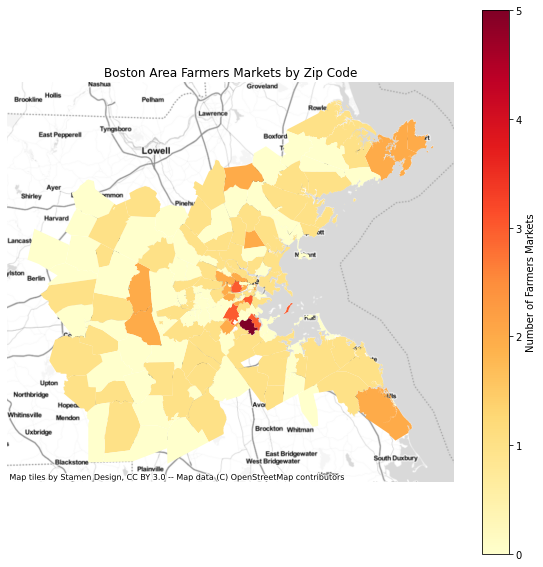

In [145]:
fig, ax = plt.subplots(figsize=(10, 10))
boston_zipcodes.plot(legend=True, column='market_count', cmap='YlOrRd', ax=ax, \
                     legend_kwds={'label':'Number of Farmers Markets'})\
.set_title('Boston Area Farmers Markets by Zip Code')
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite, \
               crs=boston_zipcodes.crs.to_string())
ax.set_axis_off()

In [148]:
head_markets = boston_zipcodes.sort_values(by='market_count', ascending=False)
head_markets.head()

,ZIPCODE,ALAND10,geometry,school_count,lib_count_x,market_count,geo_area,id,kinder_enrolled,reclass_enroll,reclass_schools,reclass_libs,reclass_markets,suitability,lib_count_y,lib_count
111,02124,7777026,"MULTIPOLYGON (((234457.750 892273.663, 234430....",14.0,2.0,5.0,ZCTA5 02124,8600000US02124,1219,3.0,3.0,3.0,3.0,3.3,2.0,2.0
64,02130,8635553,"MULTIPOLYGON (((230474.292 894530.565, 230473....",16.0,2.0,3.0,ZCTA5 02130,8600000US02130,397,3.0,3.0,3.0,3.0,3.3,2.0,2.0
133,02139,4031035,"POLYGON ((232130.866 902283.249, 232144.254 90...",7.0,1.0,3.0,ZCTA5 02139,8600000US02139,436,3.0,3.0,1.0,3.0,2.8,1.0,1.0
194,02122,5263269,"MULTIPOLYGON (((237311.389 892366.860, 237300....",10.0,2.0,3.0,ZCTA5 02122,8600000US02122,268,3.0,3.0,3.0,3.0,3.3,2.0,2.0
19,02118,2850698,"POLYGON ((234474.534 898387.415, 234457.871 89...",4.0,1.0,3.0,ZCTA5 02118,8600000US02118,348,3.0,1.0,1.0,3.0,2.1,1.0,1.0


In [149]:
head_markets = boston_zipcodes.sort_values(by='market_count', ascending=False)
head_markets.tail()

,ZIPCODE,ALAND10,geometry,school_count,lib_count_x,market_count,geo_area,id,kinder_enrolled,reclass_enroll,reclass_schools,reclass_libs,reclass_markets,suitability,lib_count_y,lib_count
78,02451,14303526,"POLYGON ((221493.704 904503.531, 221481.430 90...",2.0,1.0,0.0,ZCTA5 02451,8600000US02451,168,2.0,1.0,1.0,0.0,0.0,1.0,1.0
77,02460,3480934,"POLYGON ((224712.729 900305.384, 224780.933 90...",6.0,0.0,0.0,ZCTA5 02460,8600000US02460,132,2.0,2.0,0.0,0.0,0.0,0.0,0.0
76,01742,63296150,"POLYGON ((214918.759 914238.443, 214941.033 91...",10.0,2.0,0.0,ZCTA5 01742,8600000US01742,228,3.0,3.0,3.0,0.0,0.0,2.0,2.0
74,01862,23934124,"MULTIPOLYGON (((215844.867 919946.372, 215812....",3.0,0.0,0.0,ZCTA5 01862,8600000US01862,87,2.0,1.0,0.0,0.0,0.0,0.0,0.0
196,01503,33598202,"MULTIPOLYGON (((192620.359 903410.285, 192571....",1.0,1.0,0.0,ZCTA5 01503,8600000US01503,60,1.0,1.0,1.0,0.0,0.0,1.0,1.0


As far as local produce goes, the nearer to Boston is the place to be. 

## 7. School Enrollment

Young families typically desire, not only school enrollemnt for their own children, but to live around families who also value education. Below, the total population enrolled in school (kindergarten through 12th grade) is included in the overall suitability analysis.

In [45]:
ACS = pd.read_csv('data/demographics/ACS.csv', header=1)

In [46]:
ACS

,id,Geographic Area Name,Estimate!!Total!!Population 3 years and over enrolled in school,Margin of Error!!Total!!Population 3 years and over enrolled in school,"Estimate!!Total!!Population 3 years and over enrolled in school!!Nursery school, preschool","Margin of Error!!Total!!Population 3 years and over enrolled in school!!Nursery school, preschool",Estimate!!Total!!Population 3 years and over enrolled in school!!Kindergarten to 12th grade,Margin of Error!!Total!!Population 3 years and over enrolled in school!!Kindergarten to 12th grade,Estimate!!Total!!Population 3 years and over enrolled in school!!Kindergarten to 12th grade!!Kindergarten,Margin of Error!!Total!!Population 3 years and over enrolled in school!!Kindergarten to 12th grade!!Kindergarten,...,Estimate!!Percent in private school!!Population 18 to 24 years!!Enrolled in college or graduate school,Margin of Error!!Percent in private school!!Population 18 to 24 years!!Enrolled in college or graduate school,Estimate!!Percent in private school!!Population 18 to 24 years!!Males 18 to 24 years,Margin of Error!!Percent in private school!!Population 18 to 24 years!!Males 18 to 24 years,Estimate!!Percent in private school!!Population 18 to 24 years!!Males 18 to 24 years!!Enrolled in college or graduate school,Margin of Error!!Percent in private school!!Population 18 to 24 years!!Males 18 to 24 years!!Enrolled in college or graduate school,Estimate!!Percent in private school!!Population 18 to 24 years!!Females 18 to 24 years,Margin of Error!!Percent in private school!!Population 18 to 24 years!!Females 18 to 24 years,Estimate!!Percent in private school!!Population 18 to 24 years!!Females 18 to 24 years!!Enrolled in college or graduate school,Margin of Error!!Percent in private school!!Population 18 to 24 years!!Females 18 to 24 years!!Enrolled in college or graduate school
0,8600000US01001,ZCTA5 01001,3583,461,434,149,2084,380,128,103,...,53.2,19.3,(X),(X),57.0,27.9,(X),(X),50.3,26.0
1,8600000US01002,ZCTA5 01002,15652,772,369,120,2995,368,244,93,...,26.8,4.7,(X),(X),21.8,6.1,(X),(X),31.1,5.7
2,8600000US01003,ZCTA5 01003,11305,476,0,19,0,19,0,19,...,9.4,2.2,(X),(X),4.6,1.4,(X),(X),14.5,3.7
3,8600000US01005,ZCTA5 01005,1278,341,13,23,925,274,19,31,...,40.9,30.6,(X),(X),32.7,48.6,(X),(X),44.2,35.9
4,8600000US01007,ZCTA5 01007,3788,392,332,147,2378,267,218,80,...,36.9,20.7,(X),(X),26.2,27.0,(X),(X),50.1,22.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,8600000US02777,ZCTA5 02777,3099,322,215,95,2388,275,157,129,...,24.4,26.1,(X),(X),14.6,23.6,(X),(X),32.1,41.4
533,8600000US02779,ZCTA5 02779,1597,227,55,50,1166,166,83,52,...,0.0,22.0,(X),(X),0.0,35.8,(X),(X),0.0,37.9
534,8600000US02780,ZCTA5 02780,11884,715,823,233,8596,652,569,169,...,17.3,9.2,(X),(X),11.0,11.1,(X),(X),21.6,13.1
535,8600000US02790,ZCTA5 02790,3126,327,100,58,2228,284,113,96,...,11.6,11.8,(X),(X),10.3,13.0,(X),(X),14.1,17.6


In [47]:
ACS.rename(columns = {'Estimate!!Total!!Population 3 years and over enrolled in school!!Kindergarten to 12th grade!!Kindergarten' : 'kinder_enrolled'}, \
           inplace = True)

In [48]:
ACS

,id,Geographic Area Name,Estimate!!Total!!Population 3 years and over enrolled in school,Margin of Error!!Total!!Population 3 years and over enrolled in school,"Estimate!!Total!!Population 3 years and over enrolled in school!!Nursery school, preschool","Margin of Error!!Total!!Population 3 years and over enrolled in school!!Nursery school, preschool",Estimate!!Total!!Population 3 years and over enrolled in school!!Kindergarten to 12th grade,Margin of Error!!Total!!Population 3 years and over enrolled in school!!Kindergarten to 12th grade,kinder_enrolled,Margin of Error!!Total!!Population 3 years and over enrolled in school!!Kindergarten to 12th grade!!Kindergarten,...,Estimate!!Percent in private school!!Population 18 to 24 years!!Enrolled in college or graduate school,Margin of Error!!Percent in private school!!Population 18 to 24 years!!Enrolled in college or graduate school,Estimate!!Percent in private school!!Population 18 to 24 years!!Males 18 to 24 years,Margin of Error!!Percent in private school!!Population 18 to 24 years!!Males 18 to 24 years,Estimate!!Percent in private school!!Population 18 to 24 years!!Males 18 to 24 years!!Enrolled in college or graduate school,Margin of Error!!Percent in private school!!Population 18 to 24 years!!Males 18 to 24 years!!Enrolled in college or graduate school,Estimate!!Percent in private school!!Population 18 to 24 years!!Females 18 to 24 years,Margin of Error!!Percent in private school!!Population 18 to 24 years!!Females 18 to 24 years,Estimate!!Percent in private school!!Population 18 to 24 years!!Females 18 to 24 years!!Enrolled in college or graduate school,Margin of Error!!Percent in private school!!Population 18 to 24 years!!Females 18 to 24 years!!Enrolled in college or graduate school
0,8600000US01001,ZCTA5 01001,3583,461,434,149,2084,380,128,103,...,53.2,19.3,(X),(X),57.0,27.9,(X),(X),50.3,26.0
1,8600000US01002,ZCTA5 01002,15652,772,369,120,2995,368,244,93,...,26.8,4.7,(X),(X),21.8,6.1,(X),(X),31.1,5.7
2,8600000US01003,ZCTA5 01003,11305,476,0,19,0,19,0,19,...,9.4,2.2,(X),(X),4.6,1.4,(X),(X),14.5,3.7
3,8600000US01005,ZCTA5 01005,1278,341,13,23,925,274,19,31,...,40.9,30.6,(X),(X),32.7,48.6,(X),(X),44.2,35.9
4,8600000US01007,ZCTA5 01007,3788,392,332,147,2378,267,218,80,...,36.9,20.7,(X),(X),26.2,27.0,(X),(X),50.1,22.4
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
532,8600000US02777,ZCTA5 02777,3099,322,215,95,2388,275,157,129,...,24.4,26.1,(X),(X),14.6,23.6,(X),(X),32.1,41.4
533,8600000US02779,ZCTA5 02779,1597,227,55,50,1166,166,83,52,...,0.0,22.0,(X),(X),0.0,35.8,(X),(X),0.0,37.9
534,8600000US02780,ZCTA5 02780,11884,715,823,233,8596,652,569,169,...,17.3,9.2,(X),(X),11.0,11.1,(X),(X),21.6,13.1
535,8600000US02790,ZCTA5 02790,3126,327,100,58,2228,284,113,96,...,11.6,11.8,(X),(X),10.3,13.0,(X),(X),14.1,17.6


In [49]:
ACS_kinder = ACS[['Geographic Area Name', 'id', 'kinder_enrolled']]

In [50]:
ACS_kinder

,Geographic Area Name,id,kinder_enrolled
0,ZCTA5 01001,8600000US01001,128
1,ZCTA5 01002,8600000US01002,244
2,ZCTA5 01003,8600000US01003,0
3,ZCTA5 01005,8600000US01005,19
4,ZCTA5 01007,8600000US01007,218
...,...,...,...
532,ZCTA5 02777,8600000US02777,157
533,ZCTA5 02779,8600000US02779,83
534,ZCTA5 02780,8600000US02780,569
535,ZCTA5 02790,8600000US02790,113


In [83]:
ACS_kinder = ACS_kinder.rename\
(columns = {"Geographic Area Name" : "geo_area"}, inplace = False)

In [84]:
split = ACS_kinder["geo_area"].str.split(" ", n=1, expand=True)

In [85]:
ACS_kinder["ZIPCODE"] = split[1]

In [86]:
ACS_kinder

,geo_area,id,kinder_enrolled,ZIPCODE
0,ZCTA5 01001,8600000US01001,128,01001
1,ZCTA5 01002,8600000US01002,244,01002
2,ZCTA5 01003,8600000US01003,0,01003
3,ZCTA5 01005,8600000US01005,19,01005
4,ZCTA5 01007,8600000US01007,218,01007
...,...,...,...,...
532,ZCTA5 02777,8600000US02777,157,02777
533,ZCTA5 02779,8600000US02779,83,02779
534,ZCTA5 02780,8600000US02780,569,02780
535,ZCTA5 02790,8600000US02790,113,02790


In [55]:
boston_zipcodes = boston_zipcodes.merge(ACS_kinder, left_on='ZIPCODE', \
                                        right_on='ZIPCODE', how='inner').copy()

In [56]:
boston_zipcodes

,ZIPCODE,ALAND10,geometry,school_count,lib_count,market_count,geo_area,id,kinder_enrolled
0,01905,9219345,"MULTIPOLYGON (((243877.753 913824.638, 243872....",11.0,NaN,NaN,ZCTA5 01905,8600000US01905,259
1,01904,11708211,"POLYGON ((245700.484 914778.700, 245667.412 91...",7.0,NaN,NaN,ZCTA5 01904,8600000US01904,182
2,01930,67847425,"MULTIPOLYGON (((261745.067 931625.267, 261822....",9.0,2.0,2.0,ZCTA5 01930,8600000US01930,262
3,01915,39091336,"MULTIPOLYGON (((250787.714 926889.372, 251155....",19.0,2.0,1.0,ZCTA5 01915,8600000US01915,448
4,01921,61010486,"MULTIPOLYGON (((245193.985 936821.773, 244097....",2.0,1.0,NaN,ZCTA5 01921,8600000US01921,62
...,...,...,...,...,...,...,...,...,...
192,02129,3492181,"MULTIPOLYGON (((235381.204 902518.358, 235374....",5.0,1.0,1.0,ZCTA5 02129,8600000US02129,346
193,02128,12561059,"MULTIPOLYGON (((240184.037 905141.775, 240204....",14.0,1.0,1.0,ZCTA5 02128,8600000US02128,627
194,02122,5263269,"MULTIPOLYGON (((237311.389 892366.860, 237300....",10.0,2.0,3.0,ZCTA5 02122,8600000US02122,268
195,02151,15190546,"MULTIPOLYGON (((240204.477 905138.116, 240184....",12.0,1.0,1.0,ZCTA5 02151,8600000US02151,559


In [151]:
boston_zipcodes = boston_zipcodes.replace(np.nan, 0)

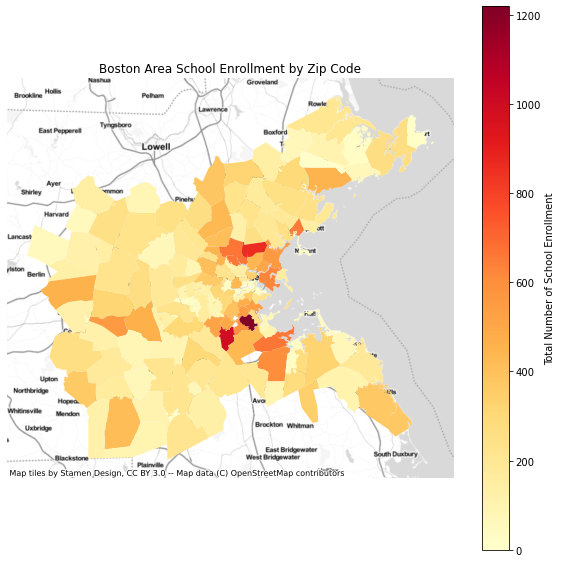

In [152]:
fig, ax = plt.subplots(figsize=(10, 10))
boston_zipcodes.plot(legend=True,column='kinder_enrolled', \
                     cmap = 'YlOrRd',ax=ax, legend_kwds={'label':'Total Number of School Enrollment'})\
.set_title('Boston Area School Enrollment by Zip Code')
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite, \
               crs=boston_zipcodes.crs.to_string())
ax.set_axis_off()

In [106]:
head_enrolled = boston_zipcodes.sort_values(by='kinder_enrolled', ascending=False)
head_enrolled.head()

,ZIPCODE,ALAND10,geometry,school_count,lib_count,market_count,geo_area,id,kinder_enrolled,reclass_enroll,reclass_schools,reclass_libs,reclass_markets,suitability
111,02124,7777026,"MULTIPOLYGON (((234457.750 892273.663, 234430....",14.0,2.0,5.0,ZCTA5 02124,8600000US02124,1219,3.0,3.0,3.0,3.0,3.3
115,02136,11887342,"MULTIPOLYGON (((229305.942 888630.588, 229298....",11.0,1.0,NaN,ZCTA5 02136,8600000US02136,985,3.0,3.0,1.0,NaN,NaN
160,02148,13063769,"POLYGON ((233850.753 908333.247, 233846.288 90...",10.0,1.0,NaN,ZCTA5 02148,8600000US02148,859,3.0,3.0,1.0,NaN,NaN
156,02155,21229511,"MULTIPOLYGON (((233977.075 909523.523, 233961....",11.0,1.0,1.0,ZCTA5 02155,8600000US02155,664,3.0,3.0,1.0,1.0,2.5
12,02169,23235908,"MULTIPOLYGON (((241077.233 890212.294, 241102....",15.0,2.0,1.0,ZCTA5 02169,8600000US02169,663,3.0,3.0,3.0,1.0,3.0


The zip codes just north and south of Boston have the highest school enrollment.

In [107]:
tail_enrolled = boston_zipcodes.sort_values(by='kinder_enrolled', ascending=False)
head_enrolled.tail()

,ZIPCODE,ALAND10,geometry,school_count,lib_count,market_count,geo_area,id,kinder_enrolled,reclass_enroll,reclass_schools,reclass_libs,reclass_markets,suitability
88,02047,619346,"POLYGON ((267395.076 875836.101, 267422.154 87...",NaN,NaN,NaN,ZCTA5 02047,8600000US02047,0,1.0,NaN,NaN,NaN,NaN
90,02199,148951,"POLYGON ((234325.760 899572.552, 234291.125 89...",NaN,NaN,NaN,ZCTA5 02199,8600000US02199,0,1.0,NaN,NaN,NaN,NaN
43,01901,641320,"POLYGON ((245437.876 912898.595, 245475.326 91...",NaN,NaN,1.0,ZCTA5 01901,8600000US01901,0,1.0,NaN,NaN,1.0,NaN
93,01467,4908783,"POLYGON ((189761.749 913618.443, 189728.468 91...",1.0,NaN,NaN,ZCTA5 01467,8600000US01467,0,1.0,1.0,NaN,NaN,NaN
36,02457,413241,"POLYGON ((219395.018 894055.646, 219398.270 89...",NaN,NaN,NaN,ZCTA5 02457,8600000US02457,0,1.0,NaN,NaN,NaN,NaN


The five zipcodes with the lowest enrollment are 02047, 02199, 01901, 01467, and 02457.

## 8. Reclassification 

Certain zip codes will be more or less desirable for young families who consider all the above factors. Therefore, each zip code should be reclassifed into three groups (highest, medium, and lowest desirability) based on the availability of resources. For this analysis, quantile statistics were used to create suitability categories. For example, zip codes with a school count distribution higher than 50% will be categorized as highly desirable. These categorizations are used for each factor mentioned above.

In [58]:
boston_zipcodes

,ZIPCODE,ALAND10,geometry,school_count,lib_count,market_count,geo_area,id,kinder_enrolled
0,01905,9219345,"MULTIPOLYGON (((243877.753 913824.638, 243872....",11.0,NaN,NaN,ZCTA5 01905,8600000US01905,259
1,01904,11708211,"POLYGON ((245700.484 914778.700, 245667.412 91...",7.0,NaN,NaN,ZCTA5 01904,8600000US01904,182
2,01930,67847425,"MULTIPOLYGON (((261745.067 931625.267, 261822....",9.0,2.0,2.0,ZCTA5 01930,8600000US01930,262
3,01915,39091336,"MULTIPOLYGON (((250787.714 926889.372, 251155....",19.0,2.0,1.0,ZCTA5 01915,8600000US01915,448
4,01921,61010486,"MULTIPOLYGON (((245193.985 936821.773, 244097....",2.0,1.0,NaN,ZCTA5 01921,8600000US01921,62
...,...,...,...,...,...,...,...,...,...
192,02129,3492181,"MULTIPOLYGON (((235381.204 902518.358, 235374....",5.0,1.0,1.0,ZCTA5 02129,8600000US02129,346
193,02128,12561059,"MULTIPOLYGON (((240184.037 905141.775, 240204....",14.0,1.0,1.0,ZCTA5 02128,8600000US02128,627
194,02122,5263269,"MULTIPOLYGON (((237311.389 892366.860, 237300....",10.0,2.0,3.0,ZCTA5 02122,8600000US02122,268
195,02151,15190546,"MULTIPOLYGON (((240204.477 905138.116, 240184....",12.0,1.0,1.0,ZCTA5 02151,8600000US02151,559


In [59]:
boston_zipcodes.describe()

,ALAND10,school_count,lib_count,market_count,kinder_enrolled
count,1.970000e+02,182.000000,161.000000,103.000000,197.000000
mean,2.421441e+07,6.989011,1.155280,1.271845,211.781726
std,2.108514e+07,4.171713,0.411689,0.629257,188.823311
min,8.031700e+04,1.000000,1.000000,1.000000,0.000000
25%,5.394724e+06,4.000000,1.000000,1.000000,69.000000
50%,1.814675e+07,6.500000,1.000000,1.000000,176.000000
75%,3.909134e+07,10.000000,1.000000,1.000000,297.000000
max,8.485373e+07,21.000000,3.000000,5.000000,1219.000000


In [60]:
boston_zipcodes['reclass_enroll'] = np.NaN

In [61]:
boston_zipcodes.kinder_enrolled < boston_zipcodes.kinder_enrolled.quantile(0.25)

0      False
1      False
2      False
3      False
4       True
       ...  
192    False
193    False
194    False
195    False
196     True
Name: kinder_enrolled, Length: 197, dtype: bool

In [62]:
boston_zipcodes.loc[boston_zipcodes.kinder_enrolled <=/
                    boston_zipcodes.kinder_enrolled.quantile(0.25), 'reclass_enroll'] = 1
boston_zipcodes.loc[(boston_zipcodes.kinder_enrolled > boston_zipcodes.kinder_enrolled.quantile(0.25)) \
                    & (boston_zipcodes.kinder_enrolled <= boston_zipcodes.kinder_enrolled.quantile(0.5)),\
                    'reclass_enroll'] = 2
boston_zipcodes.loc[(boston_zipcodes.kinder_enrolled > boston_zipcodes.kinder_enrolled.quantile(0.5)) \
                    & (boston_zipcodes.kinder_enrolled <= boston_zipcodes.kinder_enrolled.quantile(1)),\
                    'reclass_enroll']= 3

In [63]:
boston_zipcodes

,ZIPCODE,ALAND10,geometry,school_count,lib_count,market_count,geo_area,id,kinder_enrolled,reclass_enroll
0,01905,9219345,"MULTIPOLYGON (((243877.753 913824.638, 243872....",11.0,NaN,NaN,ZCTA5 01905,8600000US01905,259,3.0
1,01904,11708211,"POLYGON ((245700.484 914778.700, 245667.412 91...",7.0,NaN,NaN,ZCTA5 01904,8600000US01904,182,3.0
2,01930,67847425,"MULTIPOLYGON (((261745.067 931625.267, 261822....",9.0,2.0,2.0,ZCTA5 01930,8600000US01930,262,3.0
3,01915,39091336,"MULTIPOLYGON (((250787.714 926889.372, 251155....",19.0,2.0,1.0,ZCTA5 01915,8600000US01915,448,3.0
4,01921,61010486,"MULTIPOLYGON (((245193.985 936821.773, 244097....",2.0,1.0,NaN,ZCTA5 01921,8600000US01921,62,1.0
...,...,...,...,...,...,...,...,...,...,...
192,02129,3492181,"MULTIPOLYGON (((235381.204 902518.358, 235374....",5.0,1.0,1.0,ZCTA5 02129,8600000US02129,346,3.0
193,02128,12561059,"MULTIPOLYGON (((240184.037 905141.775, 240204....",14.0,1.0,1.0,ZCTA5 02128,8600000US02128,627,3.0
194,02122,5263269,"MULTIPOLYGON (((237311.389 892366.860, 237300....",10.0,2.0,3.0,ZCTA5 02122,8600000US02122,268,3.0
195,02151,15190546,"MULTIPOLYGON (((240204.477 905138.116, 240184....",12.0,1.0,1.0,ZCTA5 02151,8600000US02151,559,3.0


In [64]:
boston_zipcodes['reclass_schools'] = np.NaN

In [81]:
boston_zipcodes.loc[boston_zipcodes.school_count <= \
                    boston_zipcodes.school_count.quantile(0.25), 'reclass_schools'] = 1
boston_zipcodes.loc[(boston_zipcodes.school_count > boston_zipcodes.school_count.quantile(0.25))\
                    & (boston_zipcodes.school_count <= boston_zipcodes.school_count.quantile(0.5)),\
                    'reclass_schools'] = 2
boston_zipcodes.loc[(boston_zipcodes.school_count > boston_zipcodes.school_count.quantile(0.5))\
                    & (boston_zipcodes.school_count <= boston_zipcodes.school_count.quantile(1)),\
                    'reclass_schools']= 3

In [66]:
boston_zipcodes['reclass_libs'] = np.NaN

In [67]:
boston_zipcodes.loc[boston_zipcodes.lib_count <=\
                    boston_zipcodes.lib_count.quantile(0.25), 'reclass_libs'] = 1
boston_zipcodes.loc[(boston_zipcodes.lib_count > \
                     boston_zipcodes.lib_count.quantile(0.25)) \
                    & (boston_zipcodes.lib_count <= boston_zipcodes.lib_count.quantile(0.5)),\
                    'reclass_libs'] = 2
boston_zipcodes.loc[(boston_zipcodes.lib_count > boston_zipcodes.lib_count.quantile(0.5))\
                    & (boston_zipcodes.lib_count <= boston_zipcodes.lib_count.quantile(1)),\
                    'reclass_libs']= 3

In [68]:
boston_zipcodes['reclass_markets'] = np.NaN

In [79]:
boston_zipcodes.loc[boston_zipcodes.market_count <=\
                    boston_zipcodes.market_count.quantile(0.25), 'reclass_markets'] = 1
boston_zipcodes.loc[(boston_zipcodes.market_count > boston_zipcodes.market_count.quantile(0.25))\
                    & (boston_zipcodes.market_count <= boston_zipcodes.market_count.quantile(0.5)),\
                    'reclass_markets'] = 2
boston_zipcodes.loc[(boston_zipcodes.market_count > boston_zipcodes.market_count.quantile(0.5))\
                    & (boston_zipcodes.market_count <= boston_zipcodes.market_count.quantile(1)),\
                    'reclass_markets']= 3

In [80]:
boston_zipcodes

,ZIPCODE,ALAND10,geometry,school_count,lib_count,market_count,geo_area,id,kinder_enrolled,reclass_enroll,reclass_schools,reclass_libs,reclass_markets,suitability
0,01905,9219345,"MULTIPOLYGON (((243877.753 913824.638, 243872....",11.0,NaN,NaN,ZCTA5 01905,8600000US01905,259,3.0,3.0,NaN,NaN,NaN
1,01904,11708211,"POLYGON ((245700.484 914778.700, 245667.412 91...",7.0,NaN,NaN,ZCTA5 01904,8600000US01904,182,3.0,3.0,NaN,NaN,NaN
2,01930,67847425,"MULTIPOLYGON (((261745.067 931625.267, 261822....",9.0,2.0,2.0,ZCTA5 01930,8600000US01930,262,3.0,3.0,3.0,3.0,3.30
3,01915,39091336,"MULTIPOLYGON (((250787.714 926889.372, 251155....",19.0,2.0,1.0,ZCTA5 01915,8600000US01915,448,3.0,3.0,3.0,1.0,3.00
4,01921,61010486,"MULTIPOLYGON (((245193.985 936821.773, 244097....",2.0,1.0,NaN,ZCTA5 01921,8600000US01921,62,1.0,1.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,02129,3492181,"MULTIPOLYGON (((235381.204 902518.358, 235374....",5.0,1.0,1.0,ZCTA5 02129,8600000US02129,346,3.0,2.0,1.0,1.0,2.15
193,02128,12561059,"MULTIPOLYGON (((240184.037 905141.775, 240204....",14.0,1.0,1.0,ZCTA5 02128,8600000US02128,627,3.0,3.0,1.0,1.0,2.50
194,02122,5263269,"MULTIPOLYGON (((237311.389 892366.860, 237300....",10.0,2.0,3.0,ZCTA5 02122,8600000US02122,268,3.0,3.0,3.0,3.0,3.30
195,02151,15190546,"MULTIPOLYGON (((240204.477 905138.116, 240184....",12.0,1.0,1.0,ZCTA5 02151,8600000US02151,559,3.0,3.0,1.0,1.0,2.50


Now, the Boston Zipcodes table includes a suitability rating (1-3) for each factor.

## 9. Weighted Suitability

Certain factors in this analysis should hold more weight than others. Proximity to schools and overall student enrollment, for example, would likely be considered more important than the number of nearby farmers markets. To analyze these weights, enrollment and schools will be weighted at 35% each, libraries will account for 25%, and farmers markets at 15%. 

In [76]:
boston_zipcodes['suitability'] = boston_zipcodes.reclass_enroll * .35 +\
boston_zipcodes.reclass_schools * .35 +\
boston_zipcodes.reclass_libs * .25 +\
boston_zipcodes.reclass_markets * .15

In [77]:
boston_zipcodes

,ZIPCODE,ALAND10,geometry,school_count,lib_count,market_count,geo_area,id,kinder_enrolled,reclass_enroll,reclass_schools,reclass_libs,reclass_markets,suitability
0,01905,9219345,"MULTIPOLYGON (((243877.753 913824.638, 243872....",11.0,NaN,NaN,ZCTA5 01905,8600000US01905,259,3.0,3.0,NaN,NaN,NaN
1,01904,11708211,"POLYGON ((245700.484 914778.700, 245667.412 91...",7.0,NaN,NaN,ZCTA5 01904,8600000US01904,182,3.0,3.0,NaN,NaN,NaN
2,01930,67847425,"MULTIPOLYGON (((261745.067 931625.267, 261822....",9.0,2.0,2.0,ZCTA5 01930,8600000US01930,262,3.0,3.0,3.0,3.0,3.30
3,01915,39091336,"MULTIPOLYGON (((250787.714 926889.372, 251155....",19.0,2.0,1.0,ZCTA5 01915,8600000US01915,448,3.0,3.0,3.0,1.0,3.00
4,01921,61010486,"MULTIPOLYGON (((245193.985 936821.773, 244097....",2.0,1.0,NaN,ZCTA5 01921,8600000US01921,62,1.0,1.0,1.0,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
192,02129,3492181,"MULTIPOLYGON (((235381.204 902518.358, 235374....",5.0,1.0,1.0,ZCTA5 02129,8600000US02129,346,3.0,2.0,1.0,1.0,2.15
193,02128,12561059,"MULTIPOLYGON (((240184.037 905141.775, 240204....",14.0,1.0,1.0,ZCTA5 02128,8600000US02128,627,3.0,3.0,1.0,1.0,2.50
194,02122,5263269,"MULTIPOLYGON (((237311.389 892366.860, 237300....",10.0,2.0,3.0,ZCTA5 02122,8600000US02122,268,3.0,3.0,3.0,3.0,3.30
195,02151,15190546,"MULTIPOLYGON (((240204.477 905138.116, 240184....",12.0,1.0,1.0,ZCTA5 02151,8600000US02151,559,3.0,3.0,1.0,1.0,2.50


# Final Map

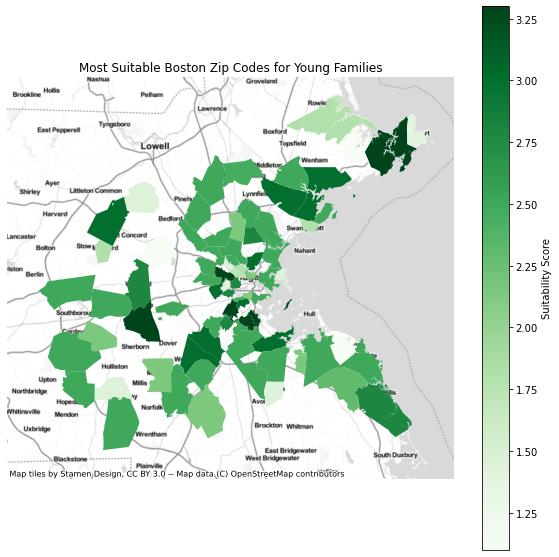

In [82]:
fig, ax = plt.subplots(figsize=(10, 10))
boston_zipcodes.plot(legend=True, column='suitability', \
                     cmap='Greens', ax=ax, legend_kwds={'label':'Suitability Score'}).set_title\
('Most Suitable Boston Zip Codes for Young Families')
cx.add_basemap(ax, source=cx.providers.Stamen.TonerLite, crs=boston_zipcodes.crs.to_string())
ax.set_axis_off()

When the weighted preferences are visualized on this map, the zip codes near Natick, Cape Ann, Boston, and Somerville all show the highest suitability score. 